<a href="https://colab.research.google.com/github/varundubey2804/Building-a-Life-Saving-Heart-Disease-Predictor/blob/main/Building_a_Life_Saving_Heart_Disease_Predictor_without_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       f

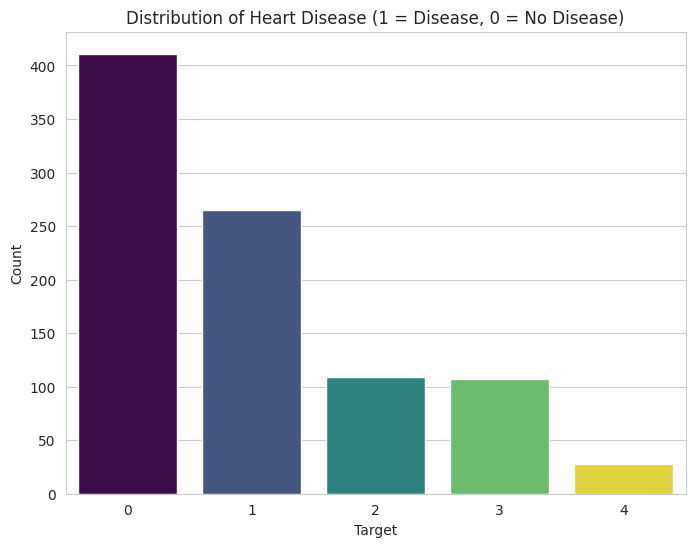

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        82
           1       0.44      0.55      0.49        53
           2       0.30      0.14      0.19        22
           3       0.14      0.14      0.14        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.34      0.33      0.33       184
weighted avg       0.54      0.57      0.55       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        82
           1       0.50      0.55      0.52        53
           2       0.11      0.09      0.10        22
           3       0.14      0.14      0.14        21
           4       0.00      0.00      0.00         6

    accuracy                           0.55       184
   macro avg       0.30      0.32      0.31       184
we

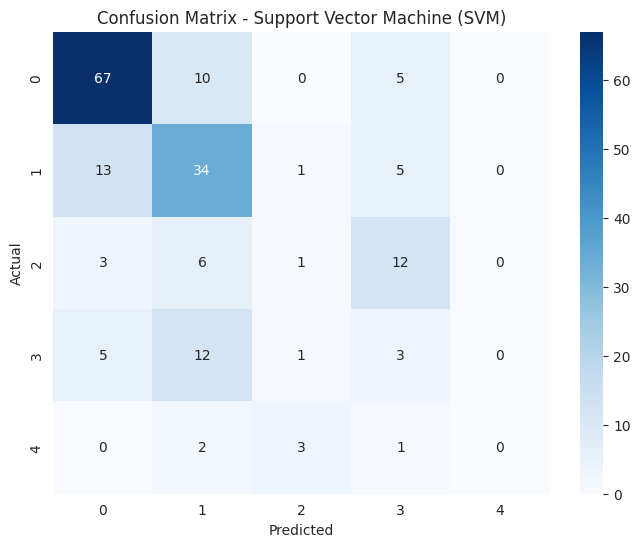

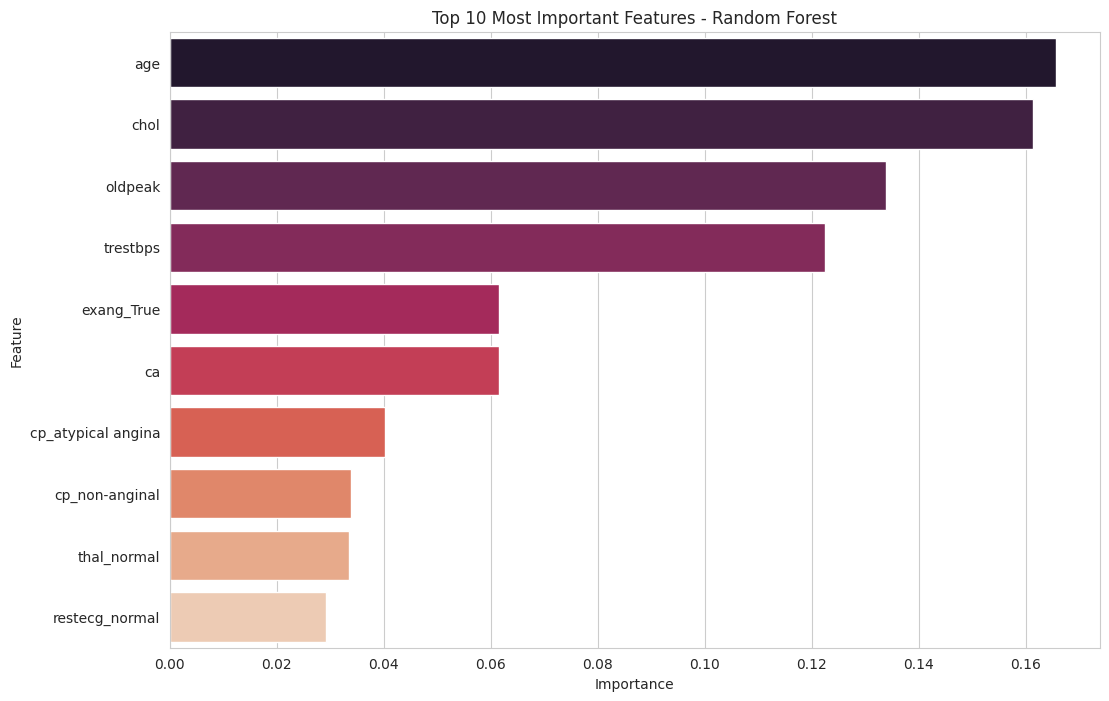

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('whitegrid')

print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
print(df.head())

print("Dataset Information:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values:", df.isnull().sum().sum())

plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df, palette='viridis', hue='num', legend=False)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Define features and target
X = df.drop(['num', 'id', 'dataset'], axis=1)
y = df['num']

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'oldpeak', 'ca'] # Removed 'thalach'

# Handle missing values
imputer_num = SimpleImputer(strategy='mean')
X[numerical_features] = imputer_num.fit_transform(X[numerical_features])

imputer_cat = SimpleImputer(strategy='most_frequent')
X[categorical_features] = imputer_cat.fit_transform(X[categorical_features])

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features]).toarray()
encoded_cols = encoder.get_feature_names_out(categorical_features)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])
X_scaled = pd.DataFrame(X_scaled, columns=numerical_features)

# Combine numerical and categorical processed features
X_final = pd.concat([X_scaled.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

# Confusion Matrix for SVM
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), # Updated labels
            yticklabels=sorted(y.unique())) # Updated labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

# Feature Importance from Random Forest
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_final.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket', hue='Feature', legend=False)
plt.title('Top 10 Most Important Features - Random Forest')
plt.show()